In [72]:
import numpy as np
import numba as nb
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.__version__

'0.25.3'

# PART 3: APPLY FUNCTION

In [48]:
## .apply() is working on each entire column(Series) of a DF at a time on default, not element

In [2]:
df = pd.DataFrame({'a': [10, 20, 30],
                   'b': [20, 30, 40],
                  })

In [3]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [4]:
df['a'] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

In [16]:
sqr = lambda x: x ** 2

In [17]:
assert sqr(2) == 4

In [6]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [12]:
df['a'].apply(sqr)

0    100
1    400
2    900
Name: a, dtype: int64

In [13]:
df['b'].map(sqr)

0     400
1     900
2    1600
Name: b, dtype: int64

In [18]:
def my_exp(x, e):
    return x ** e

In [19]:
assert my_exp(2, 3) == 8

In [20]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [22]:
df.apply(my_exp, e = 2)

,a,b
0,100,400
1,400,900
2,900,1600


In [25]:
df['a'].apply(my_exp, e = 3)

0     1000
1     8000
2    27000
Name: a, dtype: int64

In [27]:
def print_me(x):
    print(x)

In [28]:
df.apply(print_me)     # return 2 Nones for a & b shows .apply( ) works on columns by default

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [29]:
def avg_3(x, y, z):
    return (x + y + z) / 3

In [31]:
# df.apply(avg_3)           this will not work since it accepts column 'a' as its x argument, which has 3 element, but no y z specified

In [39]:
df_2 = pd.DataFrame(np.random.randn(2,3))

In [40]:
df_2

,0,1,2
0,-1.942047,-2.411573,1.428578
1,0.204858,-1.062590,0.480079


In [42]:
# df_2.apply(avg_3)        will not work neither

In [43]:
def avg_3_numpy(col):                  
    return np.mean(col)

In [44]:
df.apply(avg_3_numpy)               # this will work since numpy.mean() is vectorized and it knows how to deal with 

a    20.0
b    30.0
dtype: float64

In [46]:
def avg_3(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y + z) / 3

In [47]:
df.apply(avg_3)                # now, all it works is becoz of our input is columns(Series) in a DF manner

a    20.0
b    30.0
dtype: float64

In [49]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [54]:
def avg_modifier(x, y):
    if (x == 20):
        return np.NaN
    else:
        return (x + y) / 2

In [55]:
# avg_modifier(df['a'], df['b'])        # this will not work since it's not vectorized

### we use np.vectorize(another_function) to make it vectorized

In [58]:
avg_modifier_vectorized = np.vectorize(avg_modifier)

In [59]:
avg_modifier_vectorized(df['a'], df['b'])

array([15., nan, 35.])

### a more generic way of doing so is by DECORATOR, without defining another each time makes it easier 

In [65]:
@np.vectorize                                 #  decorator

def avg_modifier(x, y):                       #  it vectorizes avg_modifier(x, y) and returns to itself, you can still use the old func name
    if (x == 20):
        return np.NaN
    else:
        return (x + y) / 2

In [66]:
avg_modifier(df['a'], df['b'])

array([15., nan, 35.])

In [67]:
%%timeit
df.apply(avg_3) 

571 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
%%timeit
avg_modifier(df['a'], df['b'])

94 µs ± 6.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
import numba

In [76]:
@numba.vectorize                              #  decorator

def avg_modifier_numba(x, y):                       #  it vectorizes avg_modifier(x, y) and returns to itself, you can still use the old func name
    if (x == 20):
        return np.NaN
    else:
        return (x + y) / 2

In [75]:
%%timeit
avg_modifier_numba(df['a'].values, df['b'].values)

The slowest run took 10.62 times longer than the fastest. This could mean that an intermediate result is being cached.
11.1 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
tbl3 = pd.read_csv('table3.csv')
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [108]:
tbl3['rate'].values

array(['745/19987071', '2666/20595360', '37737/172006362',
       '80488/174504898', '212258/1272915272', '213766/1280428583'],
      dtype=object)

In [123]:
def cut_string(s, sep='/', position=1):
    pop = s.split(sep)[position]
    return pop

In [124]:
tbl3['rate'].apply(cut_string)

0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: rate, dtype: object

In [125]:
tbl3['pop'] = tbl3['rate'].apply(cut_string)

In [126]:
tbl3

,country,year,rate,pop
0,Afghanistan,1999,745/19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360
2,Brazil,1999,37737/172006362,172006362
3,Brazil,2000,80488/174504898,174504898
4,China,1999,212258/1272915272,1272915272
5,China,2000,213766/1280428583,1280428583


# PART 4: PLOT

![title](matplotlib_guide.png)

In [127]:
tips = sns.load_dataset('tips')

In [128]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### using Pandas built-in plotting to just play with Series

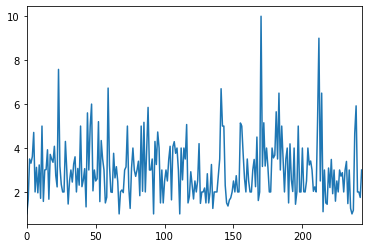

In [133]:
tips['tip'].plot()
plt.show()

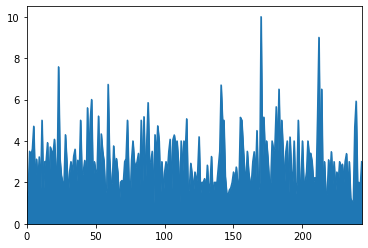

In [138]:
tips['tip'].plot.area()
plt.show()

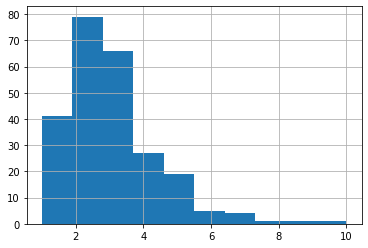

In [135]:
tips['tip'].hist()
plt.show()

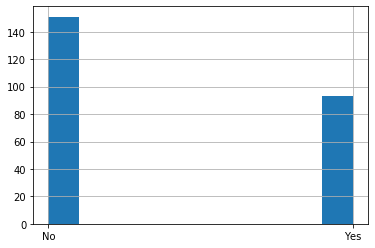

In [137]:
tips['smoker'].hist()
plt.show()

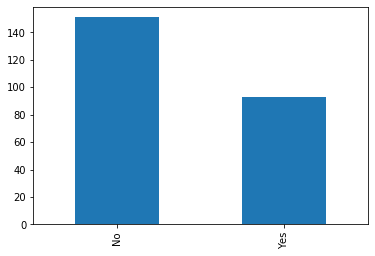

In [142]:
tips['smoker'].value_counts().plot.bar()
plt.show()

### using seaborn

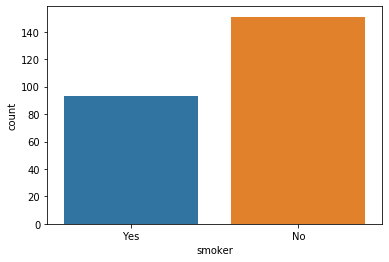

In [146]:
sns.countplot(tips['smoker'])
plt.show()

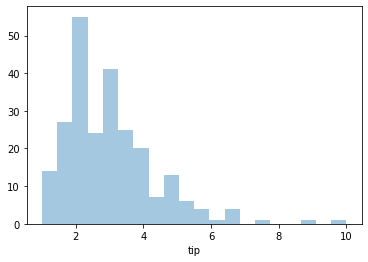

In [155]:
sns.distplot(tips['tip'], bins = 20, kde = False)
plt.show()

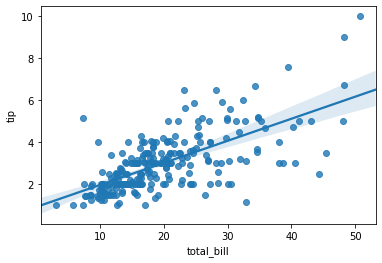

In [162]:
sns.regplot(x = tips['total_bill'], y = tips['tip'])
plt.show()

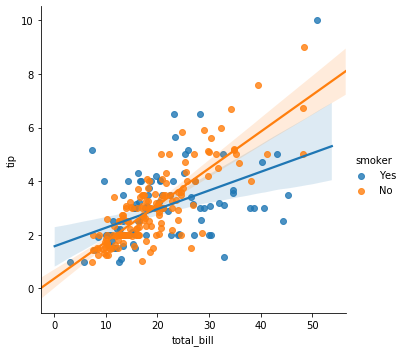

In [163]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')
plt.show()

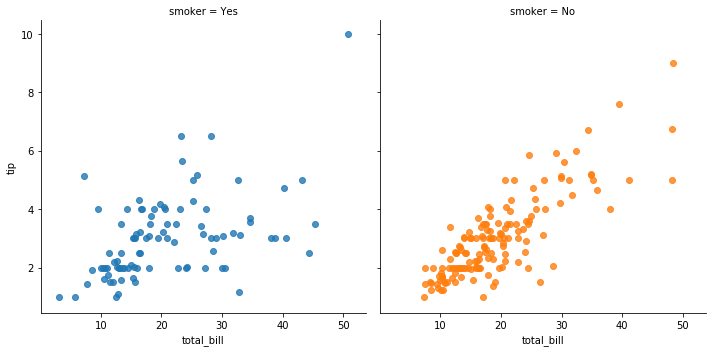

In [167]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', fit_reg = False, col = 'smoker')      # unique sns.lmplot() features
plt.show()                                                                                                 # facet-plot

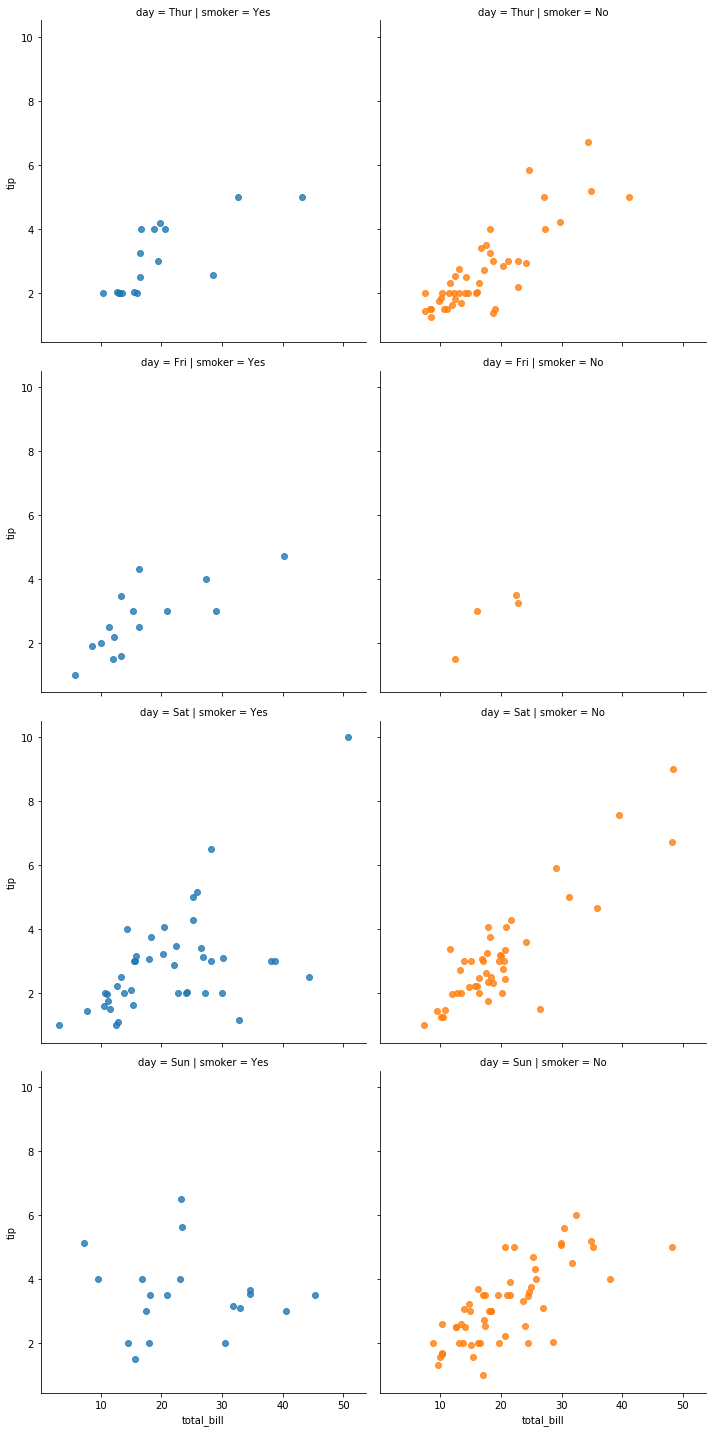

In [168]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', fit_reg = False, col = 'smoker', row ='day') # unique sns.lmplot() features
plt.show()

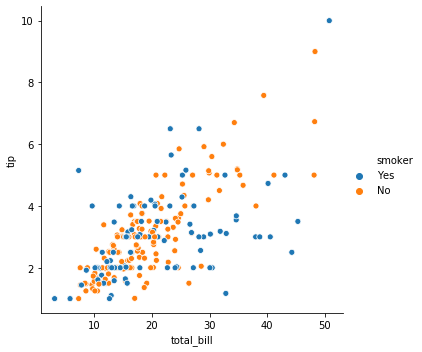

In [166]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = tips['smoker'])
plt.show()

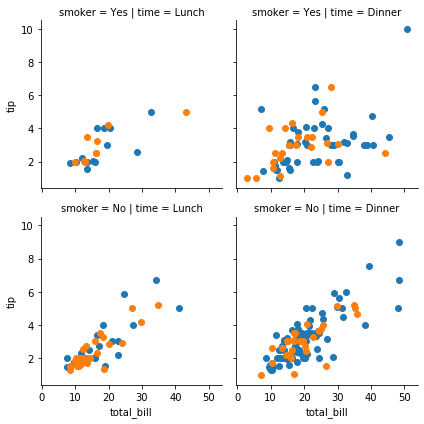

In [172]:
facet = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex')  # a matplotlib fcuntion used in a seaborn facet grid
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show()

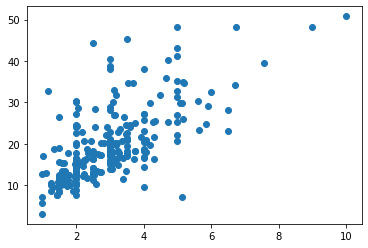

In [189]:
fig, (ax) = plt.subplots(1, 1)
ax.scatter(tips['tip'], tips['total_bill'])
plt.show()

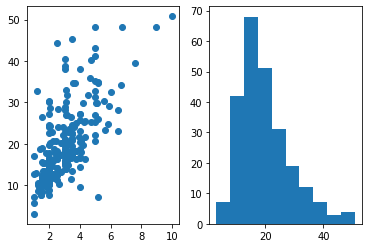

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(tips['tip'], tips['total_bill'])
ax2.hist(tips['total_bill'])

plt.show()

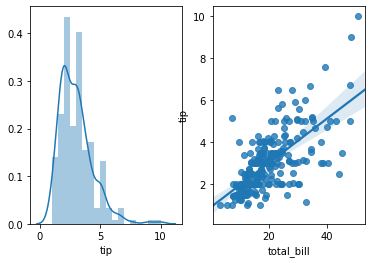

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.distplot(tips['tip'], ax = ax1)
sns.regplot(x = tips['total_bill'], y = tips['tip'], ax = ax2)

plt.show()

In [204]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [205]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


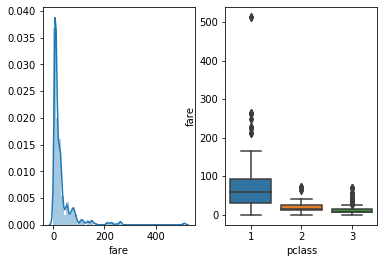

In [208]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.distplot(titanic['fare'], ax = ax1)
sns.boxplot(x = 'pclass', y = 'fare', data = titanic, ax = ax2)

plt.show()

# PART 5: SMALL DEMO OF HOW PANDAS MIGHT INTERACT WITH OTHER LIBS SUCH AS SK-LEARN

In [210]:
from sklearn import linear_model

In [211]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [212]:
lm = linear_model.LinearRegression()

In [213]:
lm.fit(X = tips[['total_bill', 'size']], y = tips['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
lm.coef_

array([0.09271334, 0.19259779])

In [215]:
lm.intercept_

0.6689447408125027

In [216]:
# dummy-encoding
# one-hot-encoding

In [218]:
tips_dummied_colinear = pd.get_dummies(tips)

In [221]:
tips_dummied.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [222]:
tips_dummied_drop = pd.get_dummies(tips, drop_first = True)

In [223]:
tips_dummied_drop.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [229]:
lm.fit(X = tips_dummied_drop[['total_bill', 'size', 'sex_Female', 'smoker_No', 'time_Dinner']], y = tips_dummied_drop['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
lm.coef_

array([0.09406811, 0.18027415, 0.02811064, 0.08390208, 0.00494742])

In [231]:
lm.intercept_

0.6082923038830446

In [232]:
titanic_subset = titanic[["survived", "class", "who"]]

In [233]:
titanic_subset.head()

,survived,class,who
0,0,Third,man
1,1,First,woman
2,1,Third,woman
3,1,First,woman
4,0,Third,man


In [234]:
titanic_dummy = pd.get_dummies(titanic_subset, drop_first=True)
titanic_dummy.head()

,survived,class_Second,class_Third,who_man,who_woman
0,0,0,1,1,0
1,1,0,0,0,1
2,1,0,1,0,1
3,1,0,0,0,1
4,0,0,1,1,0


In [239]:
titanic_subset['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [235]:
from sklearn.linear_model import LogisticRegression

In [241]:
X = titanic_dummy[['class_Second', 'class_Third', 'who_man', 'who_woman']].values

In [244]:
X

array([[0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       ...,
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 1, 0]], dtype=uint8)

In [245]:
y = titanic_dummy['survived'].values

In [247]:
y[:3]

array([0, 1, 1], dtype=int64)

In [248]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [249]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
clf.coef_

array([[-0.46549873, -1.01898083, -1.23823732,  0.20337229]])

In [252]:
clf.intercept_

array([1.00231802])